In [1]:
#%%
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from dasQt import das


In [3]:
#%%
scale = 0.001
def loadFile(file):
    das1 = das.DAS()
    das1.readData(file)
    data = das1.data[:, 73:-1]
    dx = das1.dx
    dt = das1.dt

    return data, dx, dt

def readdat(filename):
    with open(filename, 'rb') as fid:
                    D = np.fromfile(fid, dtype=np.float32)

    fs   = D[10]
    dt   = 1 / fs
    dx   = D[13]
    nx   = int(D[16])
    nt   = int(fs * D[17])
    data = D[64:].reshape((nx, nt), order='F').T  # 使用Fortran顺序进行数据的reshape

    return data, dx, dt, nt, nx

dir_path = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/2024-01-31')
files = sorted(dir_path.glob('*.dat'))
data, dx, dt, _, _ = readdat(files[336])
print(files[336].name)
data = data[:, 73:-1]
nt, nx = data.shape


2024-01-31-19-48-35-out.dat


In [4]:
import scipy.io as sio

all = sio.loadmat('/Users/zhiyuzhang/MyProjects/dasQt/utools/2024-01-31-19-48-35-out.mat')

d_bp = all['d_bp']
d_fk = all['d_fk2'].T
d_curvelet = all['d_curvelet'].T

print(d_bp.shape, d_fk.shape, d_curvelet.shape)

(120000, 74) (120000, 74) (120000, 74)


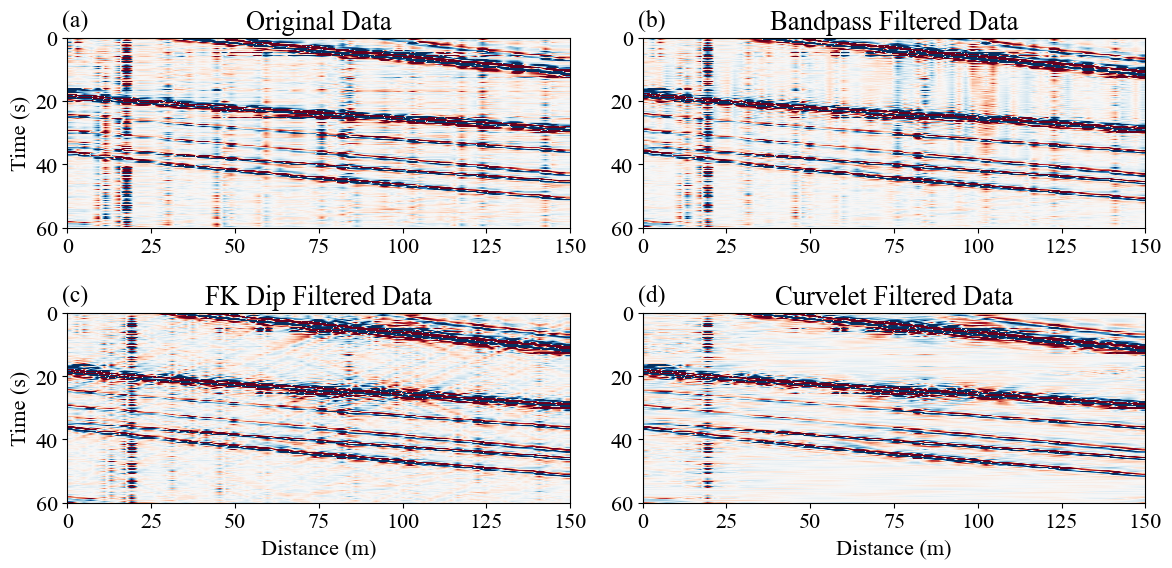

In [5]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 16})  # 设置所有文字的默认大小为16

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()
labels = ['(a)', '(b)', '(c)', '(d)']

axes[0].imshow(data, aspect='auto', cmap='RdBu', extent=[0, 150, nt*dt, 0], vmin=-scale, vmax=scale, interpolation='bilinear')
axes[0].set_title('Original Data')
axes[0].set_ylabel('Time (s)')
axes[0].text(-0.01, 1.15, labels[0], transform=axes[0].transAxes, verticalalignment='top', horizontalalignment='left', fontsize=17, color='black')

axes[1].imshow(d_bp, aspect='auto', cmap='RdBu', extent=[0, 150, nt*dt, 0], vmin=-scale, vmax=scale, interpolation='bilinear')
axes[1].set_title('Bandpass Filtered Data')
axes[1].text(-0.01, 1.15, labels[1], transform=axes[1].transAxes, verticalalignment='top', horizontalalignment='left', fontsize=17, color='black')

axes[2].imshow(d_fk, aspect='auto', cmap='RdBu', extent=[0, 150, nt*dt, 0], vmin=-scale, vmax=scale, interpolation='bilinear')
axes[2].set_title('FK Dip Filtered Data')
axes[2].set_ylabel('Time (s)')
axes[2].set_xlabel('Distance (m)')
axes[2].text(-0.01, 1.15, labels[2], transform=axes[2].transAxes, verticalalignment='top', horizontalalignment='left', fontsize=17, color='black')

axes[3].imshow(d_curvelet, aspect='auto', cmap='RdBu', extent=[0, 150, nt*dt, 0], vmin=-scale, vmax=scale, interpolation='bilinear')
axes[3].set_title('Curvelet Filtered Data')
axes[3].set_xlabel('Distance (m)')
axes[3].text(-0.01, 1.15, labels[3], transform=axes[3].transAxes, verticalalignment='top', horizontalalignment='left', fontsize=17, color='black')

fig.tight_layout()
fig.savefig('a.png', bbox_inches='tight', pad_inches=0, dpi=1000)
plt.show()